In [1]:
import cv2
import matplotlib.pyplot as plt
config_file=r"C:\Users\Prajjawal Mishra\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

frozen_model=r"C:\Users\Prajjawal Mishra\Downloads\frozen_inference_graph.pb"
model=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels=[]
file_name=r"C:\Users\Prajjawal Mishra\Downloads\labels.txt"
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

print(classLabels)    
print(len(classLabels))

model.setInputSize(640,360)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)
    

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


< cv2.dnn.Model 0000019FD4B35210>

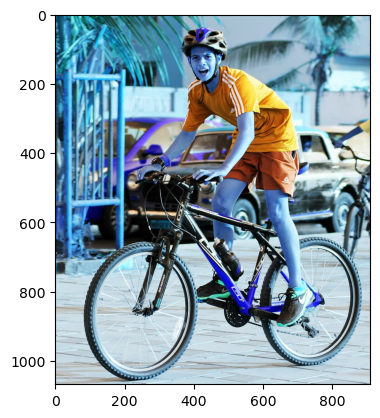

In [2]:
img=cv2.imread(r"C:\Users\Prajjawal Mishra\Downloads\bicycle-rider-child-boy.jpg")

plt.imshow(img)

[2 1 3 3 3] [[ 72 456 806 597]
 [247  55 507 782]
 [109 319 768 364]
 [675 329 234 282]
 [ 63 308 338 338]]


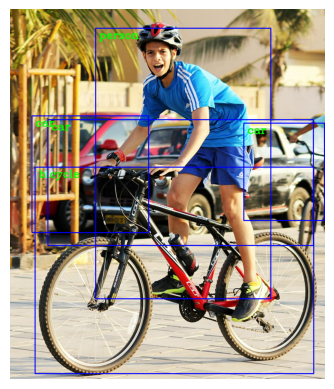

In [3]:
import cv2
import matplotlib.pyplot as plt



config_file=r"C:\Users\Prajjawal Mishra\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

frozen_model=r"C:\Users\Prajjawal Mishra\Downloads\frozen_inference_graph.pb"
net=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels=[]
file_name=r"C:\Users\Prajjawal Mishra\Downloads\labels.txt"
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')


net.setInputSize(320,320)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5,127,5,127.5))
net.setInputSwapRB(True)
img=cv2.imread(r"C:\Users\Prajjawal Mishra\Downloads\bicycle-rider-child-boy.jpg")

plt.imshow(img)


net.setInputSize(320, 320)  

ClassIds, confs, bbox = net.detect(img, confThreshold=0.5)
print(ClassIds,bbox)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN


for ClassId, confidence, box in zip(ClassIds.flatten(), confs.flatten(), bbox):
   
   
    cv2.rectangle(img,box,color=(255, 0, 0),thickness=2)
    
    
        
    cv2.putText(img, classLabels[ClassId-1],(box[0]+10,box[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0, 255, 0),2)
   
        
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()        


In [1]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

classNames = []
classFile = r"C:\Users\Prajjawal Mishra\Downloads\labels.txt"
with open(classFile, 'rt') as fpt:
    classNames = fpt.read().rstrip('\n').split('\n')

configPath = r"C:\Users\Prajjawal Mishra\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weightPath = r"C:\Users\Prajjawal Mishra\Downloads\frozen_inference_graph.pb"

net = cv2.dnn_DetectionModel(weightPath, configPath)

net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

while True:
    success, img = cap.read()
    ClassIds, confs, bbox = net.detect(img, confThreshold=0.5)

    print(ClassIds, bbox)

    if len(ClassIds) != 0:
        for ClassId, confidence, box in zip(ClassIds.flatten(), confs.flatten(), bbox):
            className = classNames[ClassId - 1] if ClassId - 1 < len(classNames) else 'Unknown'
            cv2.rectangle(img, box, color=(255, 0, 0), thickness=2)
            cv2.putText(img, className, (box[0] + 10, box[1] + 30),
                        cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("output", img)
    
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[1] [[ 86 171 524 309]]
[1] [[ 82 172 531 308]]
[ 1 38] [[ 83 172 527 308]
 [478  35  45  53]]
[ 1 38] [[ 82 171 528 309]
 [477  35  45  53]]
[1] [[ 80 171 536 309]]
[ 1 38] [[ 82 172 531 308]
 [477  35  46  53]]
[ 1 38] [[ 81 171 535 309]
 [477  35  46  52]]
[ 1 38] [[ 82 171 535 309]
 [477  35  45  52]]
[1] [[ 82 172 533 308]]
[1] [[ 84 172 531 308]]
[1] [[ 86 171 529 309]]
[1] [[ 86 171 523 309]]
[1] [[ 86 169 523 311]]
[1] [[ 88 174 522 306]]
[1] [[ 90 174 527 306]]
[1] [[ 85 176 527 304]]
[1] [[ 92 171 517 308]]
[1] [[ 95 169 509 311]]
[1] [[ 90 172 514 308]]
[ 1 38] [[ 92 174 512 306]
 [477  35  45  53]]
[1] [[ 96 172 509 308]]
[1] [[ 92 172 509 308]]
[1] [[ 91 171 516 309]]
[1] [[ 81 178 529 302]]
[1] [[ 84 179 521 301]]
[1] [[ 82 175 527 305]]
[ 1 38] [[ 85 175 524 305]
 [477  35  46  52]]
[ 1 38] [[ 82 177 527 303]
 [477  37  45  53]]
[1] [[ 81 177 525 303]]
[1] [[ 82 176 526 304]]
[ 1 38] [[ 86 176 521 304]
 [477  36  45  53]]
[1] [[ 84 178 525 302]]
[1] [[ 84 175 529 305]]
[

In [1]:
import cv2
import numpy as np
import os


training_folder = r"C:\Users\Prajjawal Mishra\Downloads\training"
os.chdir(training_folder)

video = cv2.VideoCapture(0)

if not video.isOpened():
    print("Error: Failed to open camera.")
    exit()

config_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.cfg" 
weights_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.weights"
net = cv2.dnn.readNet(weights_file_path, config_file_path)

output_layers = ['yolo_139', 'yolo_150', 'yolo_161']


class_labels = [
    'person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa',
    'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]


def get_class_name(class_id):
    return class_labels[class_id]

while True:
    ret, frame = video.read()
    
    if frame is None:
        print("Error: Failed to capture frame from the video.")
        break

    height, width, _ = frame.shape

    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)


    net.setInput(blob)

    outs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5: 
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

               
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            class_id = class_ids[i]
            label = get_class_name(class_id)

            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break


video.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np
import os


training_folder = r"C:\Users\Prajjawal Mishra\Downloads\training"
os.chdir(training_folder)


from food_facts import food_facts


video = cv2.VideoCapture(0)  


if not video.isOpened():
    print("Error: Failed to open camera.")
    exit()

labels = []


config_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.cfg" 
weights_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.weights"
net = cv2.dnn.readNet(weights_file_path, config_file_path)


output_layers = ['yolo_139', 'yolo_150', 'yolo_161']


class_labels = [
    'person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa',
    'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

def get_class_name(class_id):
    return class_labels[class_id]

while True:
    ret, frame = video.read()
    
   
    if frame is None:
        print("Error: Failed to capture frame from the video.")
        break

    height, width, _ = frame.shape

    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)

   
    net.setInput(blob)

    outs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:  
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

               
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    detected_objects = []
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            class_id = class_ids[i]
            label = get_class_name(class_id)

         
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            labels.append(label)
            detected_objects.append(label)

    cv2.imshow('frame', frame)

    if detected_objects:
        print("Detected Objects:")
        for obj in detected_objects:
            print("\t", obj)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
q
video.release()
cv2.destroyAllWindows()




Detected Objects:
	 bird
	 bird
	 person
Detected Objects:
	 bird
	 bird
	 person
Detected Objects:
	 bird
	 bird
	 person
Detected Objects:
	 bird
	 bird
	 person
Detected Objects:
	 cell phone
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 bird
	 bird
	 cell phone
	 person
Detected Objects:
	 bird
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 bird
	 bird
	 person
Detected Objects:
	 person
Detected Objects:
	 bird
	 person
Detected Objects:
	 bird
	 bird
	 person
	 cell phone
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell phone
	 person
Detected Objects:
	 cell pho

In [2]:
import cv2
import os
import numpy as np


training_folder = r"C:\Users\Prajjawal Mishra\Downloads\training"
os.chdir(training_folder)


from food_facts import food_facts


def calculate_centroid(box):
    x, y, w, h = box
    return (int(x + w / 2), int(y + h / 2))


def euclidean_distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


def assign_object_ids(boxes, prev_objects):
    objects = {}

    if len(boxes) == 0:
        return objects

    if len(prev_objects) == 0:
    
        for i, box in enumerate(boxes):
            objects[i] = {
                'centroid': calculate_centroid(box),
                'box': box
            }
    else:
        prev_ids = list(prev_objects.keys())
        prev_centroids = [prev_objects[id]['centroid'] for id in prev_ids]

        if len(prev_centroids) == 0:
            
            for i, box in enumerate(boxes):
                objects[i] = {
                    'centroid': calculate_centroid(box),
                    'box': box
                }
        else:
            
            for i, box in enumerate(boxes):
                centroid = calculate_centroid(box)
                distances = [euclidean_distance(centroid, prev_centroid) for prev_centroid in prev_centroids]
                if len(distances) > 0:
                    closest_id = np.argmin(distances)
                    objects[prev_ids[closest_id]] = {
                        'centroid': centroid,
                        'box': box
                    }
                    del prev_ids[closest_id]
                    del prev_centroids[closest_id]
                else:
                    
                    objects[len(prev_objects) + i] = {
                        'centroid': centroid,
                        'box': box
                    }

            
            for id in prev_ids:
                objects[id] = prev_objects[id]

    return objects


def determine_movement_direction(curr_centroid, prev_centroid):
    if curr_centroid[0] > prev_centroid[0]:
        return "right"
    elif curr_centroid[0] < prev_centroid[0]:
        return "left"
    else:
        return "stationary"


video = cv2.VideoCapture(0)  


if not video.isOpened():
    print("Error: Failed to open camera.")
    exit()

prev_objects = {}

config_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.cfg" 
weights_file_path = r"C:\Users\Prajjawal Mishra\Downloads\training\yolov4.weights"
net = cv2.dnn.readNet(weights_file_path, config_file_path)

output_layers = ['yolo_139', 'yolo_150', 'yolo_161']

try:
    while True:
        ret, frame = video.read()
        
        if frame is None:
            print("Error: Failed to capture frame from the video.")
            break

       
        height, width, _ = frame.shape

        blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)

        
        net.setInput(blob)

        outs = net.forward(output_layers)

        boxes = []
        confidences = []
        class_ids = []

      
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5: 
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

        objects = assign_object_ids(boxes, prev_objects)

      
        for id, obj in objects.items():
            x, y, w, h = obj['box']
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            text = determine_movement_direction(obj['centroid'], prev_objects[id]['centroid']) if id in prev_objects else "N/A"
            cv2.putText(frame, text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

      
        prev_objects = objects

        
        cv2.imshow('frame', frame)

        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    
    video.release()
    cv2.destroyAllWindows()
